In [126]:
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
raca_0_ate_5_anos = pd.read_csv("../0_ate_5/raca_cor/analise_raca_2024.csv")
raca_0_ate_5_anos['faixa_etaria'] = '0 a 5 anos'

raca_5_ate_10_anos = pd.read_csv("../5_ate_10/raca_cor/analise_raca_2024.csv")
raca_5_ate_10_anos['faixa_etaria'] = '5 a 10 anos'

raca_adolescente = pd.read_csv("../adolescente/raca_cor/analise_raca_2024.csv")
raca_adolescente['faixa_etaria'] = 'Adolescentes (10 a 18 anos)'

df_completo = pd.concat([raca_0_ate_5_anos, raca_5_ate_10_anos, raca_adolescente])


In [119]:
df_completo['total'] = df_completo['total'].astype(str).str.replace('.', '', regex=True)
df_completo['total'] = pd.to_numeric(df_completo['total'], errors='coerce')

In [130]:
colunas_para_converter = ['qtd_magreza_acentuada', 'qtd_magreza', 'qtd_eutrofia', 'qtd_sobrepeso', 'qtd_obesidade', 'qtd_obesidade_grave'] 

for coluna in colunas_para_converter:
    df_completo[coluna] = df_completo[coluna].astype(str).str.strip()  
    df_completo[coluna] = df_completo[coluna].str.replace(r'\.', '', regex=True)  
    df_completo[coluna] = pd.to_numeric(df_completo[coluna], errors='coerce') 

In [131]:
colunas_para_somar = ['qtd_magreza_acentuada', 'qtd_magreza', 'qtd_eutrofia', 'qtd_sobrepeso', 'qtd_obesidade', 'qtd_obesidade_grave'] 
df_grouped = df_completo.groupby('raca')[colunas_para_somar].sum().reset_index()
df_grouped

,raca,qtd_magreza_acentuada,qtd_magreza,qtd_eutrofia,qtd_sobrepeso,qtd_obesidade,qtd_obesidade_grave
0,Amarela,87232,153201,3070110,843229,410910,239053
1,Branca,82773,178737,4114605,777406,646854,323451
2,Indigena,9649,4656,130573,34978,12607,6121
3,Parda,135638,258892,4031722,1185483,623872,316042
4,Preta,10656,13314,398346,108096,58641,32155


In [132]:

df_grouped['total'] = df_grouped[colunas_para_somar].sum(axis=1)
for coluna in colunas_para_somar:
    df_grouped[f'{coluna}_perc'] = (df_grouped[coluna] / df_grouped['total']) 

df_grouped


,raca,qtd_magreza_acentuada,qtd_magreza,qtd_eutrofia,qtd_sobrepeso,qtd_obesidade,qtd_obesidade_grave,total,qtd_magreza_acentuada_perc,qtd_magreza_perc,qtd_eutrofia_perc,qtd_sobrepeso_perc,qtd_obesidade_perc,qtd_obesidade_grave_perc
0,Amarela,87232,153201,3070110,843229,410910,239053,4803735,0.018159,0.031892,0.639109,0.175536,0.085540,0.049764
1,Branca,82773,178737,4114605,777406,646854,323451,6123826,0.013517,0.029187,0.671901,0.126948,0.105629,0.052818
2,Indigena,9649,4656,130573,34978,12607,6121,198584,0.048589,0.023446,0.657520,0.176137,0.063484,0.030823
3,Parda,135638,258892,4031722,1185483,623872,316042,6551649,0.020703,0.039516,0.615375,0.180944,0.095224,0.048239
4,Preta,10656,13314,398346,108096,58641,32155,621208,0.017154,0.021432,0.641244,0.174009,0.094398,0.051762


In [133]:
df_grouped['perc_total_obesidade'] = df_grouped['qtd_sobrepeso_perc'] + df_grouped['qtd_obesidade_perc'] + df_grouped['qtd_obesidade_grave_perc']
df_grouped['perc_total_desnutricao'] = df_grouped['qtd_magreza_acentuada_perc'] + df_grouped['qtd_magreza_perc']

df_grouped = df_grouped[['perc_total_obesidade', 'perc_total_desnutricao', 'qtd_eutrofia_perc','raca']]

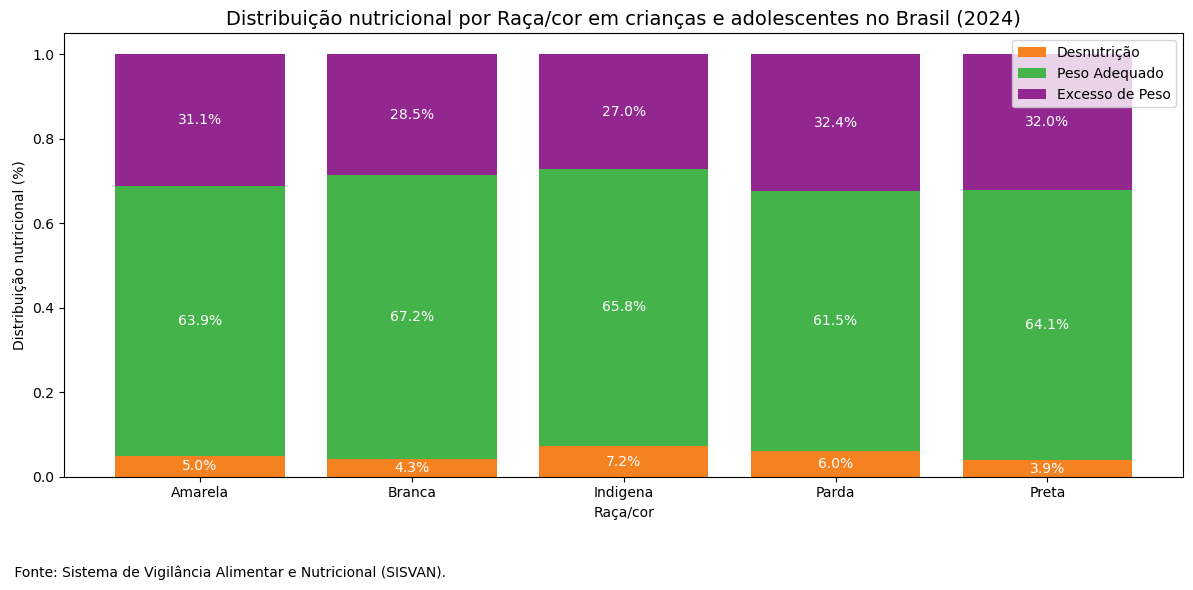

In [135]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(df_grouped['raca'], df_grouped['perc_total_desnutricao'], label='Desnutrição', color='#F58220')
ax.bar(df_grouped['raca'], df_grouped['qtd_eutrofia_perc'], bottom=df_grouped['perc_total_desnutricao'], label='Peso Adequado', color='#44B34A')
ax.bar(df_grouped['raca'], df_grouped['perc_total_obesidade'], bottom=df_grouped['perc_total_desnutricao'] + df_grouped['qtd_eutrofia_perc'], label='Excesso de Peso', color='#92278F')

for index, row in df_grouped.iterrows():
    plt.text(index, row['perc_total_desnutricao'] / 2, f"{row['perc_total_desnutricao']*100:.1f}%", 
             ha='center', va='center', color='white', fontsize=10)
    plt.text(index, row['perc_total_desnutricao'] + row['qtd_eutrofia_perc'] / 2, 
             f"{row['qtd_eutrofia_perc']*100:.1f}%", ha='center', va='center', color='white', fontsize=10)
    plt.text(index, row['perc_total_desnutricao'] + row['qtd_eutrofia_perc'] + row['perc_total_obesidade'] / 2, 
             f"{row['perc_total_obesidade']*100:.1f}%", ha='center', va='center', color='white', fontsize=10)
ax.set_title('Distribuição nutricional por Raça/cor em crianças e adolescentes no Brasil (2024)', fontsize=14)
ax.set_ylabel('Distribuição nutricional (%)')
ax.set_xlabel('Raça/cor')

ax.legend(loc='upper right')
plt.figtext(0.01, -0.02, " Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN).", ha="left", fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) 
plt.show()
